## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

答：  
1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。


In [3]:
import json

# 读取 JSON 文件
with open('hw4_data.json', 'r') as file:
    data = json.load(file)

# 获取节点和边数据
nodes = data['nodes']
edges = data['edges']

# 构建影响力得分字典
influence_scores = {node[0]: node[1] for node in nodes}

# 构建社交关系字典
social_network = {}

for edge in edges:
    user1, user2, weight = edge
    if user1 not in social_network:
        social_network[user1] = {}
    social_network[user1][user2] = weight
    
    if user2 not in social_network:
        social_network[user2] = {}
    social_network[user2][user1] = weight

# 打印结果
print("影响力得分字典:")
print(influence_scores)

print("\n社交关系字典:")
print(social_network)


影响力得分字典:
{'Yanyan-Wang': 50.95, 'Aarebecca': 23.82, 'pomelo-nwu': 22.36, 'tyn1998': 16.64, 'frank-zsy': 15.8, 'will-ww': 13.5, 'zhicheng-ning': 8.35, 'xgdyp': 7.58, 'stevending1st': 6.28, 'andyhuang18': 6.27, 'Zzzzzhuzhiwei': 6.21, 'wxharry': 4.79, 'bifenglin': 4.01, 'yangzy0603': 3.83, 'lidongze0629': 3.73, 'wj23027': 3.56, 'PureNatural': 3.37, 'kunal8411': 3.36, 'birdflyi': 3.28, 'lhbvvvvv': 3.12, 'xiaoya-yaya': 2.39, 'stealth-bombeer': 2.36, 'yikenie': 2.31, 'RackweLLizm': 2.28, 'pranavshuklaa': 1.79, 'Vlad116': 1.79, 'Maple0817': 1.63, 'yvonneyx': 1.22, 'yubo0923': 1.12, 'zhaosj975': 1, 'longyanz': 0.74}

社交关系字典:
{'Yanyan-Wang': {'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}, 'Aarebecca': {'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7

In [4]:
# 找出每个用户的直接朋友，并以列表形式列出
direct_friends = {user: list(friends.keys()) for user, friends in social_network.items()}

# 输出用户的直接朋友列表
for user, friends in direct_friends.items():
    print(f"{user} 的直接朋友: {friends}")

Yanyan-Wang 的直接朋友: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca 的直接朋友: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu 的直接朋友: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
andyhuang18 的直接朋友: ['tyn1998', 'wj23027', 'will-ww', 'zhicheng-ning', 'lhbvvvvv', 'frank-zsy', 'bifenglin', 'wxharry', 'Zzzzzhuzhiwei', 'stevending1st', 'PureNatural', 'pranavshuklaa', 'pomelo-nwu', 'stealth-bombeer', 'Vlad116', 'kunal8411', 'xgdyp', 'longyanz', 'xiaoya-yaya', 'zhaosj975', 'birdf

2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。


In [5]:
# 计算每个用户的度数（朋友数量）
degree_counts = {user: len(friends) for user, friends in direct_friends.items()}

# 找出度数最多的前5个用户
top_5_by_degree = sorted(degree_counts.items(), key=lambda x: x[1], reverse=True)[:5]

print("度数最多的前5个用户及其朋友数量:")
for user, degree in top_5_by_degree:
    print(f"{user}: {degree} 朋友")


度数最多的前5个用户及其朋友数量:
tyn1998: 30 朋友
frank-zsy: 30 朋友
pomelo-nwu: 24 朋友
andyhuang18: 23 朋友
wj23027: 23 朋友


In [6]:
# 找出影响力最高的前5个用户
top_5_by_influence = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]

print("影响力最高的前5个用户:")
for user, score in top_5_by_influence:
    print(f"{user}: {score} 影响力得分")


影响力最高的前5个用户:
Yanyan-Wang: 50.95 影响力得分
Aarebecca: 23.82 影响力得分
pomelo-nwu: 22.36 影响力得分
tyn1998: 16.64 影响力得分
frank-zsy: 15.8 影响力得分


In [7]:
# 计算综合影响力分数和朋友数量的加权得分
combined_scores = {user: 0.5 * degree_counts.get(user, 0) + 0.5 * influence_scores.get(user, 0)
                   for user in influence_scores}

# 找出综合得分最高的用户
top_influential_users = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)[:5]

print("综合影响力得分和朋友数量最有影响力的用户:")
for user, score in top_influential_users:
    print(f"{user}: {score} 综合得分")


综合影响力得分和朋友数量最有影响力的用户:
Yanyan-Wang: 32.475 综合得分
tyn1998: 23.32 综合得分
pomelo-nwu: 23.18 综合得分
frank-zsy: 22.9 综合得分
Aarebecca: 17.41 综合得分


3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 

In [8]:
# Yanyan-Wang其“朋友的朋友”中最有可能成为新朋友的用户
#先找到 Yanyan-Wang 的直接朋友，然后找出这些朋友的朋友（排除 Yanyan-Wang 自己和已经是朋友的用户），并统计出现次数
def find_friends_of_friends(user, direct_friends):
    # 找到直接朋友
    direct = set(direct_friends.get(user, []))
    friends_of_friends = {}
    
    # 遍历直接朋友的朋友
    for friend in direct:
        for friend_of_friend in direct_friends.get(friend, []):
            if friend_of_friend != user and friend_of_friend not in direct:
                friends_of_friends[friend_of_friend] = friends_of_friends.get(friend_of_friend, 0) + 1
    
    return friends_of_friends

# 找出 Yanyan-Wang 的朋友的朋友
friends_of_friends_yanyan = find_friends_of_friends("Yanyan-Wang", direct_friends)

# 根据共同朋友数量排序
top_friend_recommendations = sorted(friends_of_friends_yanyan.items(), key=lambda x: x[1], reverse=True)

print("Yanyan-Wang 朋友的朋友推荐:")
for user, count in top_friend_recommendations:
    print(f"{user}: 有 {count} 个共同朋友")


Yanyan-Wang 朋友的朋友推荐:
will-ww: 有 6 个共同朋友
Zzzzzhuzhiwei: 有 6 个共同朋友
lhbvvvvv: 有 6 个共同朋友
zhicheng-ning: 有 6 个共同朋友
PureNatural: 有 6 个共同朋友
xgdyp: 有 6 个共同朋友
birdflyi: 有 6 个共同朋友
xiaoya-yaya: 有 6 个共同朋友
longyanz: 有 6 个共同朋友
zhaosj975: 有 6 个共同朋友
stevending1st: 有 5 个共同朋友
wxharry: 有 4 个共同朋友
pranavshuklaa: 有 4 个共同朋友
stealth-bombeer: 有 4 个共同朋友
Vlad116: 有 4 个共同朋友
kunal8411: 有 4 个共同朋友


In [9]:
# 找出与 Yanyan-Wang 连接强度最高的用户（直接朋友和非直接朋友）
connections = []

for user, connections_dict in social_network.items():
    if user == "Yanyan-Wang":
        for friend, strength in connections_dict.items():
            connections.append((friend, strength))
    else:
        if "Yanyan-Wang" in connections_dict:
            connections.append((user, connections_dict["Yanyan-Wang"]))

# 根据连接强度排序
top_connections = sorted(connections, key=lambda x: x[1], reverse=True)[:5]

print("与 Yanyan-Wang 连接强度最高的5个用户:")
for user, strength in top_connections:
    print(f"{user}: 连接强度 {strength}")


与 Yanyan-Wang 连接强度最高的5个用户:
Aarebecca: 连接强度 25.3
Aarebecca: 连接强度 25.3
pomelo-nwu: 连接强度 25.09
pomelo-nwu: 连接强度 25.09
yangzy0603: 连接强度 11.85


4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

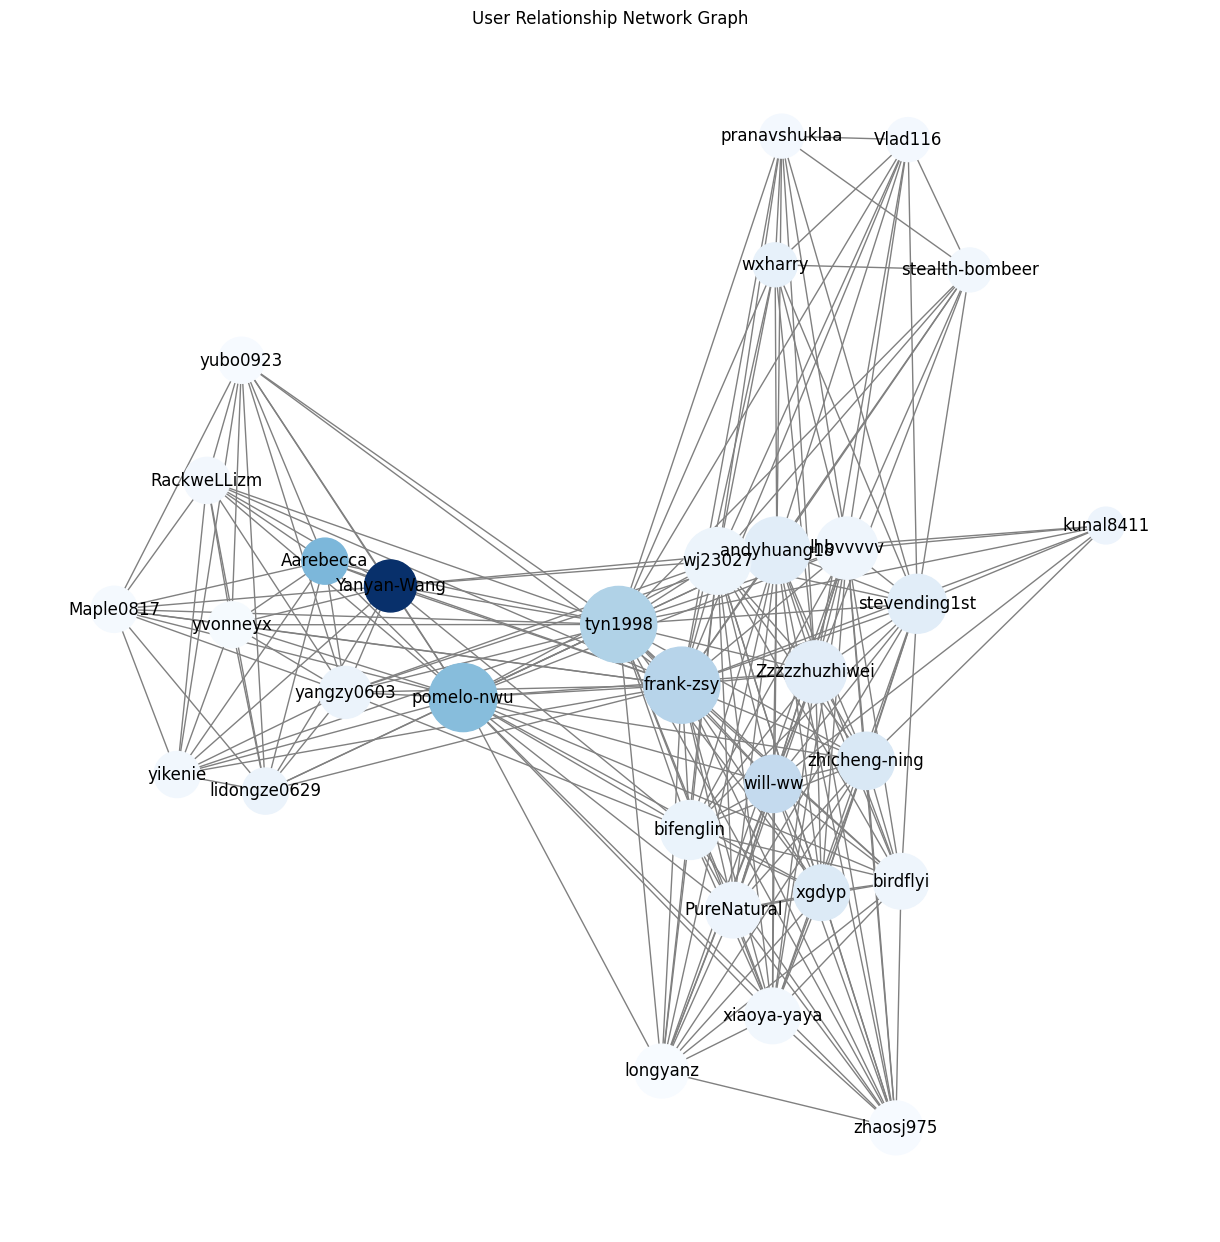

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建无向图
G = nx.Graph()

# 添加节点和边
for node in nodes:
    G.add_node(node[0], size=influence_scores[node[0]])

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# 根据影响力得分对节点进行着色
node_color = [influence_scores[node] for node in G.nodes]
node_size = [degree_counts[node] * 100 for node in G.nodes]

# 绘制图
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # 节点布局
nx.draw(G, pos, with_labels=True, node_color=node_color, node_size=node_size, cmap=plt.cm.Blues, edge_color='gray')
plt.title('User Relationship Network Graph')
plt.show()
